In [31]:
import albumentations as alb
import copy
import time
import os
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [32]:
augmentor = alb.Compose([alb.RandomCrop(width=640, height=360), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='yolo', 
                                                  label_fields=['class_labels'],
                                                  min_area=1024, 
                                                  min_visibility=0.3))

In [33]:
img = cv2.imread(os.path.join('weeddata','orignal','images','weed8.jpg'))

In [34]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

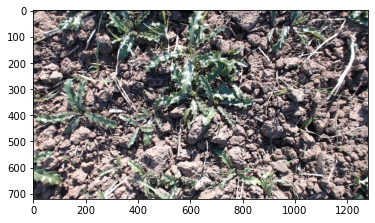

In [35]:
plt.imshow(img)

In [36]:
boxlist=[]
boxlist.clear()
bboxfile=open(os.path.join('weeddata','orignal','labels','weed8.txt'))
for line in bboxfile:
    boxlist.append(list(map(float,(line.split()))))
boxlist

[[2.0, 0.483984, 0.210417, 0.194531, 0.345833],
 [2.0, 0.140625, 0.495139, 0.220313, 0.270833],
 [2.0, 0.299609, 0.125, 0.163281, 0.25],
 [2.0, 0.443359, 0.420833, 0.113281, 0.272222],
 [2.0, 0.552344, 0.497917, 0.08125, 0.2625],
 [2.0, 0.607031, 0.839583, 0.140625, 0.256944],
 [2.0, 0.780469, 0.113889, 0.14375, 0.227778]]

In [37]:
class_labels =[]
for col in boxlist:
    class_labels.append(col[0])
    del col[0]
    

In [38]:
class_labels

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [39]:
boxlist
#boxlist = np.array(boxlist)

[[0.483984, 0.210417, 0.194531, 0.345833],
 [0.140625, 0.495139, 0.220313, 0.270833],
 [0.299609, 0.125, 0.163281, 0.25],
 [0.443359, 0.420833, 0.113281, 0.272222],
 [0.552344, 0.497917, 0.08125, 0.2625],
 [0.607031, 0.839583, 0.140625, 0.256944],
 [0.780469, 0.113889, 0.14375, 0.227778]]

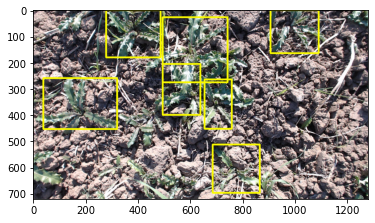

In [40]:
w = 1280
h = 720
coords=[]
coords.clear()
for ls in boxlist:
    x1 = int( float(float(ls[0]) * w ))
    y1 = int( float(float(ls[1]) * h ))
    xw = int( float(float(ls[2]) * w /2))
    yw = int( float(float(ls[3]) * h /2))
    
    #coords.append([(float(float(ls[0]) * w )-float(float(ls[2]) * w /2))/w,
    #               (float(float(ls[1]) * h )-float(float(ls[3]) * h /2))/h,
    #               (float(float(ls[0]) * w )+float(float(ls[2]) * w /2))/w,
    #               (float(float(ls[1]) * h )+float(float(ls[3]) * h /2))/h])
    
    coords.append([x1,y1,xw,yw])
    
    start_point = (x1 - xw, y1 - yw )
    end_point = (x1 + xw, y1 + yw )
    thickness =5
    cv2.rectangle(img,start_point,end_point,(250,250,0),thickness)
             
plt.imshow(img)

In [41]:
coords

[[619, 151, 124, 124],
 [180, 356, 141, 97],
 [383, 90, 104, 90],
 [567, 302, 72, 97],
 [707, 358, 52, 94],
 [776, 604, 90, 92],
 [999, 82, 92, 82]]

In [42]:
augmented = augmentor(image=img, bboxes=boxlist, class_labels=class_labels)

In [43]:
augmented['bboxes']

[(0.5101555, 0.8708331666666667, 0.38906199999999996, 0.2583336666666667),
 (0.42890550000000005,
  0.6666673333333332,
  0.22656199999999999,
  0.5444440000000002),
 (0.6468754999999999,
  0.5124993333333333,
  0.1625000000000002,
  0.5250000000000001)]

In [44]:
transformed =augmented['bboxes']
len(transformed[0])

4

In [48]:
for x in range(60):
    augmented = augmentor(image=img, bboxes=boxlist, class_labels=class_labels)
    print(augmented['class_labels'])
    cv2.imwrite(os.path.join("weeddata","augmented","images","myfile.jpg"),augmented['image'])
    file =open(os.path.join("weeddata","augmented","labels","myfile.txt"), "w")
    for i in transformed:
        label =0
        file.write(str(int(augmented['class_labels'][label])))
        file.write(" ")
        for n in i:
            file.write(str(n))
            file.write(" ")
        if label < 4 :
            file.write("\n")
        label += 1
    file.close()
    


[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0]
[2.0]
[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0, 2.0]
[2.0, 2.0, 2.0, 2.0]
[2.

In [ ]:
augmented['class_labels']

In [ ]:
#cv2.putText(augmented['image'],
#            augmented['class_labels'][0],(int((augmented['bboxes'][0][0])*640)*10,int((augmented['bboxes'][0][1])*320)*10),
#            cv2.FONT_HERSHEY_SIMPLEX,
#            1,
#            (0,250,250),
#            5)
plt.imshow(augmented['image'])

In [ ]:
plt.imshow(augmented['image'])

In [55]:
for image in os.listdir(os.path.join("weeddata","orignal","images")):
    orignal_image = cv2.imread(os.path.join("weeddata","orignal","images",image))
    bbox_file=os.path.join("weeddata","orignal","labels", image.split(".")[0]+".txt")
    
    orignal_image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
    
    org_bbox=[]
    class_labels =[]
    alb_bbox = []
    
    if os.path.exists(bbox_file):
        bbox_file =open(bbox_file,"r")
        for line in bbox_file:
            org_bbox.append(list(map(float,line.split())))
        bbox_file.close()
    else:
        continue
    
    alb_bbox=copy.deepcopy(org_bbox)
   
    for col in alb_bbox:
        class_labels.append(col[0])
        del col[0]
    
    w = 640
    h = 360
    coords=[]
    
    for ls in alb_bbox:
        x1 = float(float(ls[0]) * w )
        y1 = float(float(ls[1]) * h )
        xw = float(ls[2]) 
        yw = float(ls[3]) 
    
        #coords.append([(float(float(ls[0]) * w )-float(float(ls[2]) * w /2))/w,
        #               (float(float(ls[1]) * h )-float(float(ls[3]) * h /2))/h,
        #               (float(float(ls[0]) * w )+float(float(ls[2]) * w /2))/w,
        #               (float(float(ls[1]) * h )+float(float(ls[3]) * h /2))/h])
       
        
        #print(x1,y1,xw,yw)
        coords.append([((x1+xw)/2)/640,
                       ((y1+yw)/2)/360,
                       xw/640,
                       yw/360])
    try:
        for x in range(60):
            print(class_labels)
            augmented = augmentor(image=orignal_image, bboxes=alb_bbox, class_labels=class_labels)
            #print(augmented['class_labels'])
            cv2.imwrite(os.path.join("weeddata","augmented","images",f'{image.split(".")[0]}_{x}.jpg'), augmented['image'])
            txt_file = open(os.path.join("weeddata","augmented","labels",f'{image.split(".")[0]}_{x}.txt'),"w")
            
            for items in augmented['bboxes']:
                label = 0
                txt_file.write(str(int(augmented['class_labels'][label])))
                txt_file.write(" ")
                for n in items:
                    txt_file.write(str(n))
                    txt_file.write(" ")
                if label < len(augmented['bboxes']) :
                    txt_file.write("\n")
                label += 1
            
            txt_file.close()
                
    except Exception as e:
        print(e)
            

[[0.37361572265625, 0.08858801805555555, 0.0003564453125, 0.0007870361111111112], [0.26999810625, 0.22533394166666665, 0.0005432125, 0.0013618833333333333], [0.32998614921874997, 0.38914748749999994, 0.0002062984375, 0.000516975], [0.21384656093749999, 0.4177506611111111, 0.000349121875, 0.0007793222222222223]]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0, 2.0]
[0.0, 2.0, 2.0,

[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[0.0, 2.0, 2.0]
[[0.29219646796875, 0.12041071249999998, 0.00040893593749999997, 0.001238425], [0.2724071015625, 0.35950639444444443, 0.000283203125, 0.0009567888888888888]]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0]
[2.0, 0.0

In [ ]:
org_bbox.clear()
    class_labels.clear()
    alb_bbox.clear()
    coords.clear()
class_labels